# Census Income Project

# Problem Statement:

# This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

# Description of fnlwgt (final weight)

# The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

# 1) A single cell estimate of the population 16+ for each state.

# 2) Controls for Hispanic Origin by age and sex.

# 3) Controls by Race, age and sex.

# We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [90]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [91]:
data = pd.read_csv(r"D:\New folder\census_income.csv")

In [92]:
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [93]:
#Lets check the shape of dataset
data.shape

(32560, 15)

So , here we have 32560 rows and 15 columns

# Data is Duplicated ?

In [94]:
data.duplicated().sum()

24

so,  here we have 24 Duplicated Data

In [95]:
# dropping duplicates

data.drop_duplicates(keep = 'first', inplace = True)

In [96]:
#Lets check the data type of dataset
data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

so here we have 

int64 type - Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week this all columns

Oject type - Workclass,Education,Marital_status,Occupation,R

# value count Function

In [97]:
data['Workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [98]:
data['Occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

In [99]:
data['Native_country'].value_counts()

 United-States                 29152
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [100]:
data['Marital_status'].value_counts()

 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [101]:
data['Sex'].value_counts()

 Male      21774
 Female    10762
Name: Sex, dtype: int64

In [102]:
data['Race'].value_counts()

 White                 27794
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [103]:
data['Income'].value_counts()

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

In [104]:
data['Education'].value_counts()

 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64

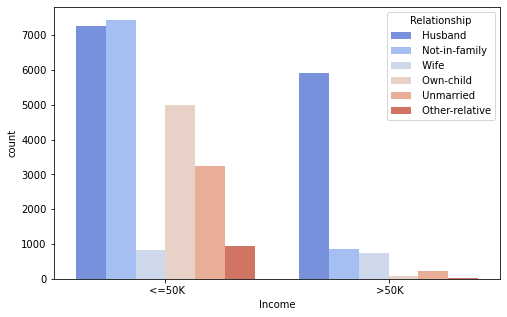

In [105]:
plt.figure(figsize=(8,5))
sns.countplot(data['Income'],palette='coolwarm',hue='Relationship',data=data);

# Filling ? Values

In [106]:
# Replacing value to nan value

In [107]:
data.Native_country.replace(' ?', np.nan, inplace = True)
data.Workclass.replace(' ?', np.nan, inplace = True)
data.Occupation.replace(' ?', np.nan, inplace = True)

In [108]:
# Checking for null values

data.isna().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

# Filling NULL Value  with mode

In [109]:
data['Workclass']=data['Workclass'].fillna(data['Workclass'].mode()[0])
data['Occupation']=data['Occupation'].fillna(data['Occupation'].mode()[0])
data['Native_country']=data['Native_country'].fillna(data['Native_country'].mode()[0])

# Income 
# Replace label columns

In [110]:
 from sklearn.preprocessing import LabelEncoder

In [111]:
lab_enc=LabelEncoder()

In [112]:
df2 = lab_enc.fit_transform(data['Income'])
pd.Series(df2)

0        0
1        0
2        0
3        0
4        0
        ..
32531    0
32532    1
32533    0
32534    0
32535    1
Length: 32536, dtype: int32

In [113]:
data['Income']=df2
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [114]:
data['Income'].value_counts()

0    24697
1     7839
Name: Income, dtype: int64

In [115]:
data.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,-0.076448,0.036224,0.077676,0.057745,0.068515,0.234039
Fnlwgt,-0.076448,1.000000,-0.043353,0.000433,-0.010267,-0.018900,-0.009521
Education_num,0.036224,-0.043353,1.000000,0.122661,0.079901,0.148426,0.335299
Capital_gain,0.077676,0.000433,0.122661,1.000000,-0.031638,0.078408,0.223340
Capital_loss,0.057745,-0.010267,0.079901,-0.031638,1.000000,0.054229,0.150498
Hours_per_week,0.068515,-0.018900,0.148426,0.078408,0.054229,1.000000,0.229659
Income,0.234039,-0.009521,0.335299,0.223340,0.150498,0.229659,1.000000


This because this is not so much of a concern and if you want to plot this we will use heat map in this i will write  

<AxesSubplot:>

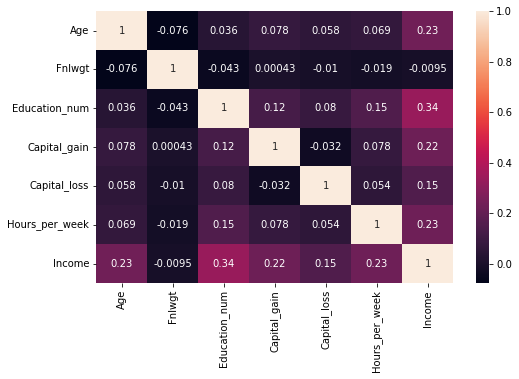

In [116]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(), annot=True)

# Histogram

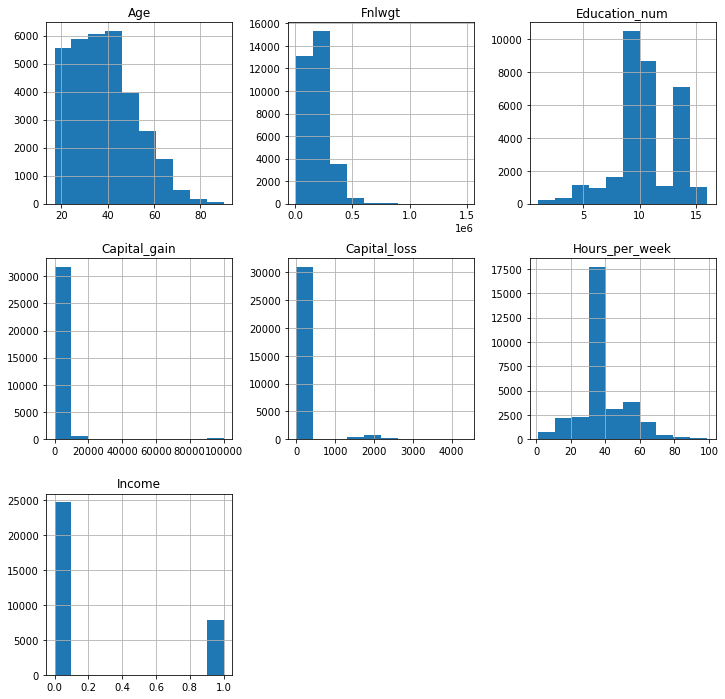

In [117]:
data.hist(figsize=(12,12),layout=(3,3),sharex=False);

# BOXPLOT 

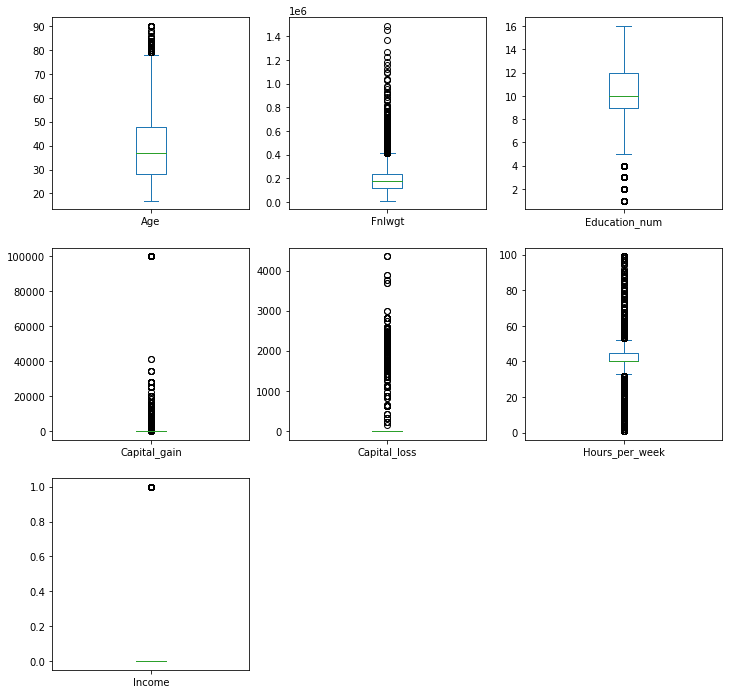

In [118]:
data.plot(kind='box',figsize=(12,12), layout=(3,3), sharex=False, subplots=True);

<AxesSubplot:xlabel='Race', ylabel='count'>

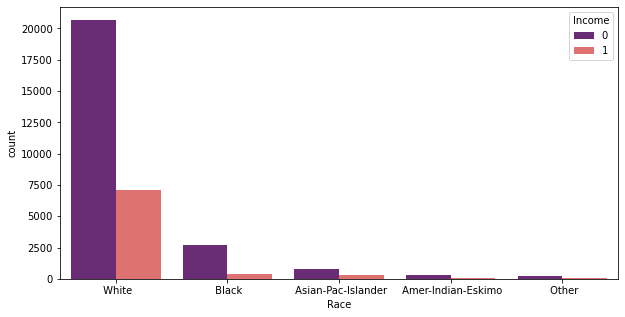

In [119]:
plt.figure(figsize=(10,5))
sns.countplot(data['Race'], hue='Income', data=data, palette='magma')

<AxesSubplot:xlabel='Education', ylabel='count'>

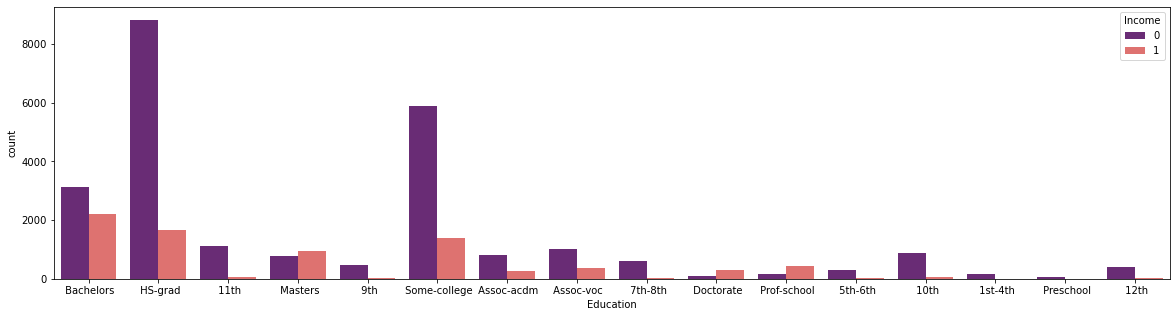

In [120]:
plt.figure(figsize=(20,5))
sns.countplot(data['Education'], hue='Income', data=data, palette='magma')

<AxesSubplot:xlabel='Education', ylabel='count'>

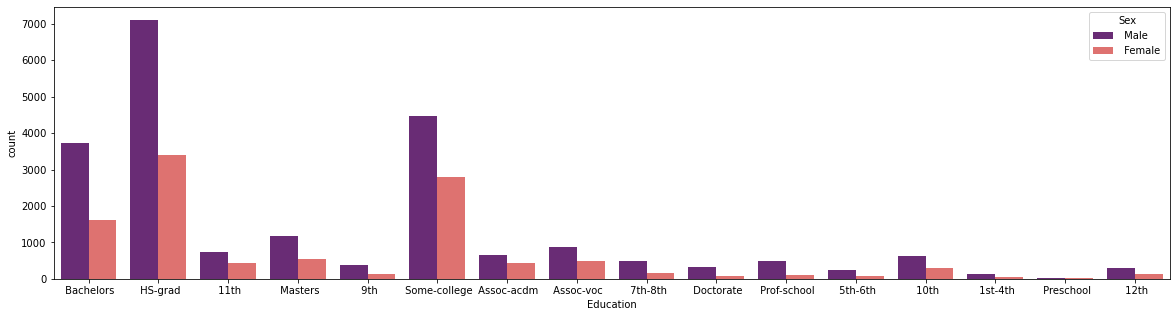

In [121]:
plt.figure(figsize=(20,5))
sns.countplot(data['Education'], hue='Sex', data=data, palette='magma')

<AxesSubplot:xlabel='Workclass', ylabel='count'>

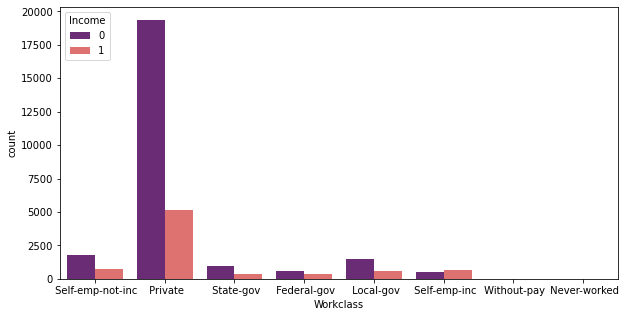

In [122]:
plt.figure(figsize=(10,5))
sns.countplot(x='Workclass', hue='Income', data = data,palette='magma')

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

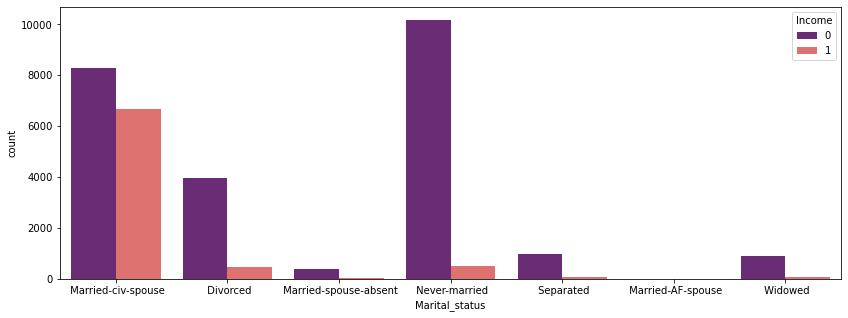

In [123]:
plt.figure(figsize=(14,5))
sns.countplot(x='Marital_status', hue='Income', data = data,palette='magma')

<AxesSubplot:xlabel='Occupation', ylabel='count'>

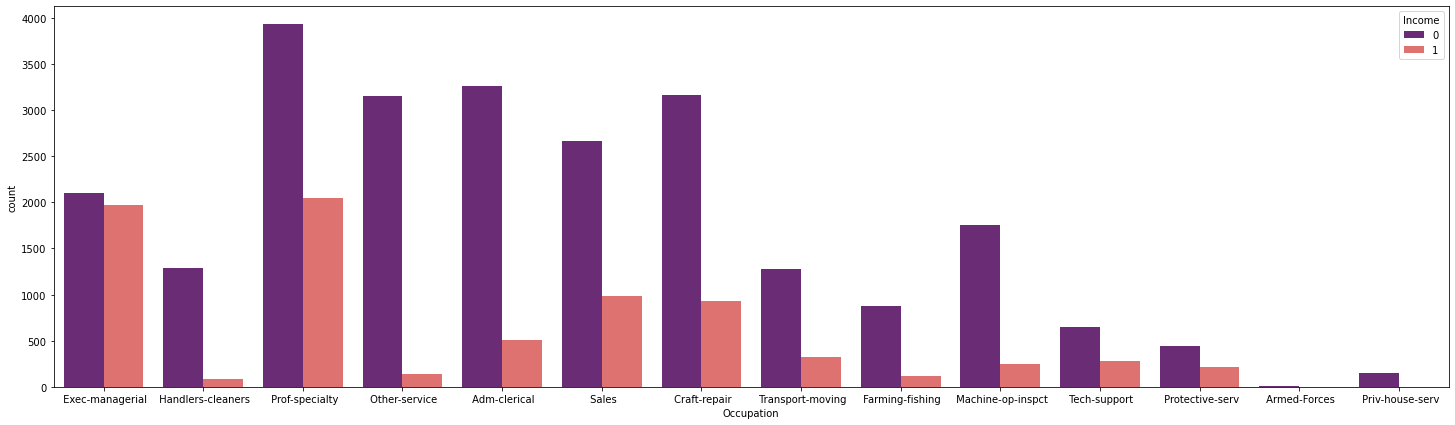

In [124]:
plt.figure(figsize=(25,7))
sns.countplot(x='Occupation', hue='Income', data = data,palette='magma')

<AxesSubplot:xlabel='Relationship', ylabel='count'>

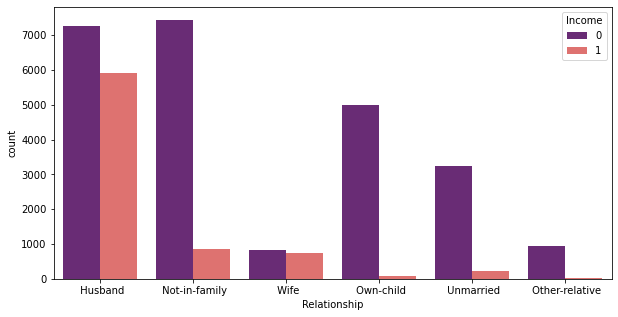

In [125]:
plt.figure(figsize=(10,5))
sns.countplot(x='Relationship', hue='Income', data = data,palette='magma')

# CHECKING FOR OUTLIERS

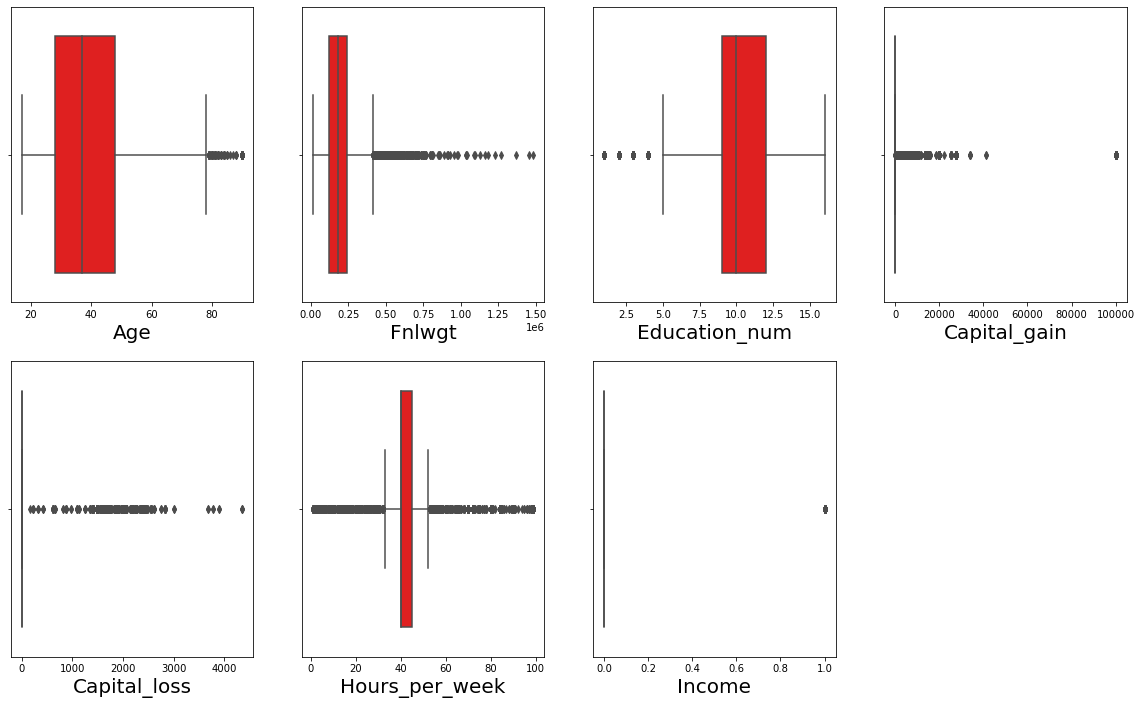

In [126]:
numerical_col=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week','Income']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=8:
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(data[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


# Removing Outliers:

# Zscore method:

In [127]:
from scipy.stats import zscore
z_score=zscore(data[['Age','Fnlwgt','Hours_per_week']])
abs_z_score=np.abs(z_score)

In [128]:
filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
count,31646.000000,31646.000000,31646.000000,31646.000000,31646.000000,31646.000000,31646.000000
mean,38.383872,185321.719301,10.085603,1071.922455,87.341117,40.079125,0.240504
std,13.347389,94528.515467,2.559842,7368.643817,402.016224,11.181322,0.427397
min,17.000000,12285.000000,1.000000,0.000000,0.000000,4.000000,0.000000
25%,28.000000,117606.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,177667.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,234442.250000,12.000000,0.000000,0.000000,45.000000,0.000000
max,79.000000,506436.000000,16.000000,99999.000000,4356.000000,77.000000,1.000000


# Checking and removing Skewness:

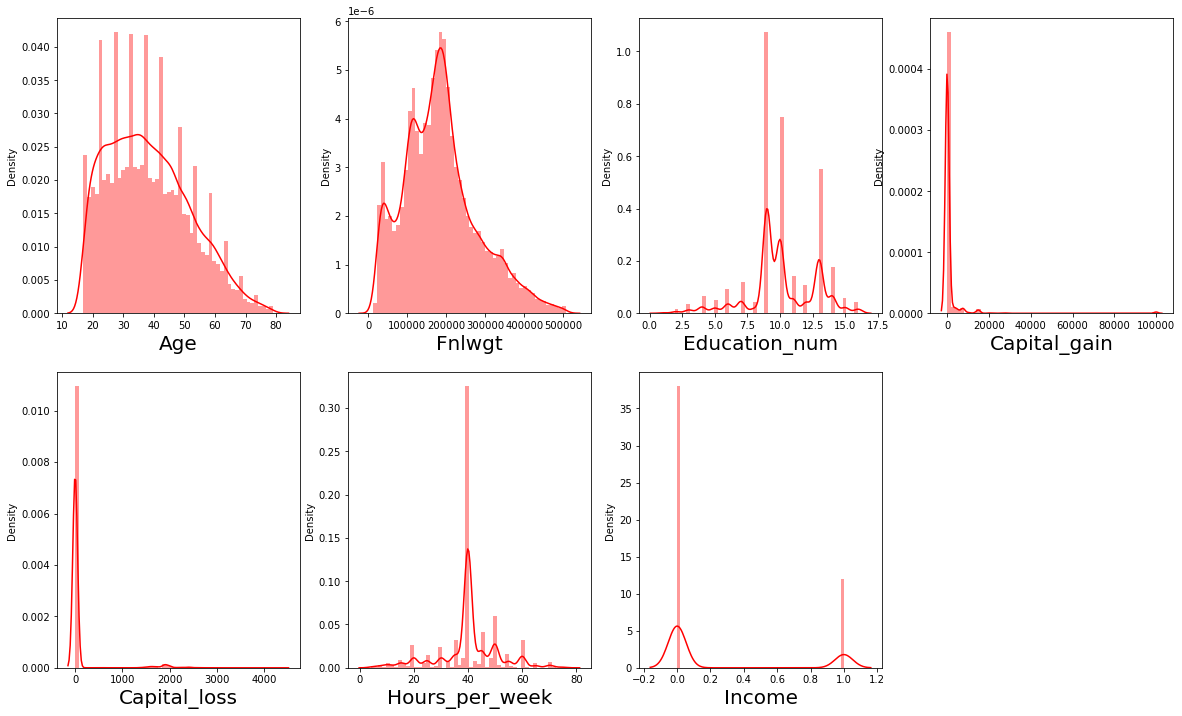

In [129]:
numerical_col=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week','Income']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=8:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [130]:
data.skew()

Age                0.470678
Fnlwgt             0.635054
Education_num     -0.307880
Capital_gain      11.991997
Capital_loss       4.559942
Hours_per_week    -0.337561
Income             1.214386
dtype: float64

In [131]:
from sklearn.preprocessing import power_transform

data[['Education_num','Capital_gain','Capital_loss','Hours_per_week']]=power_transform(data[['Education_num','Capital_gain','Capital_loss','Hours_per_week']])
   

In [132]:
data.skew()

Age               0.470678
Fnlwgt            0.635054
Education_num     0.025093
Capital_gain      3.023638
Capital_loss      4.291717
Hours_per_week    0.107677
Income            1.214386
dtype: float64

# Encoding:

In [133]:
df1 = data.copy()
df1 = df1.apply(LabelEncoder().fit_transform)
df1.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,5,2875,9,12,2,3,0,4,1,0,0,9,38,0
1,21,3,13888,11,8,0,5,1,4,1,0,0,36,38,0
2,36,3,15126,1,6,2,5,0,2,1,0,0,36,38,0
3,11,3,19089,9,12,2,9,5,2,0,0,0,36,4,0
4,20,3,17451,12,13,2,3,5,4,0,0,0,36,38,0


In [134]:
df1['Income'].value_counts()

0    24035
1     7611
Name: Income, dtype: int64

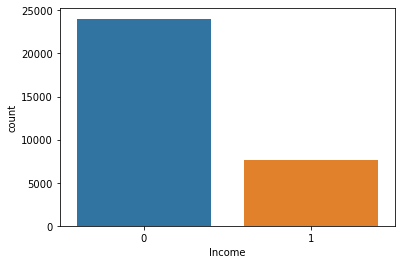

In [135]:
sns.countplot(x='Income',data=df1)
plt.show()

# Correlation using HEAT map:

In [136]:
# Checking the correlation between features and the target
cor = df1.corr()
cor


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.037851,-0.073417,-0.008009,0.041029,-0.284334,-0.000086,-0.267450,0.028040,0.091176,0.129659,0.063995,0.094510,-0.002872,0.245367
Workclass,0.037851,1.000000,-0.024433,0.005277,0.004437,-0.020614,0.007607,-0.056863,0.046378,0.070075,0.017800,0.006422,0.029687,-0.001094,0.003723
Fnlwgt,-0.073417,-0.024433,1.000000,-0.024205,-0.042074,0.029566,0.002456,0.005743,-0.004102,0.027294,-0.005564,-0.008931,-0.014696,-0.065934,-0.010923
Education,-0.008009,0.005277,-0.024205,1.000000,0.355476,-0.037755,-0.040215,-0.011705,0.015774,-0.027432,0.031727,0.014879,0.058606,0.076085,0.077845
Education_num,0.041029,0.004437,-0.042074,0.355476,1.000000,-0.068399,0.070739,-0.096609,0.033684,0.013628,0.154667,0.084719,0.160064,0.087918,0.336189
Marital_status,-0.284334,-0.020614,0.029566,-0.037755,-0.068399,1.000000,0.034151,0.186412,-0.067695,-0.128585,-0.075595,-0.037100,-0.198185,-0.020212,-0.198533
Occupation,-0.000086,0.007607,0.002456,-0.040215,0.070739,0.034151,1.000000,-0.037233,-0.004122,0.047051,0.011653,0.009813,-0.020935,-0.002648,0.034063
Relationship,-0.267450,-0.056863,0.005743,-0.011705,-0.096609,0.186412,-0.037233,1.000000,-0.115368,-0.582821,-0.093615,-0.063145,-0.262662,-0.010464,-0.250493
Race,0.028040,0.046378,-0.004102,0.015774,0.033684,-0.067695,-0.004122,-0.115368,1.000000,0.089111,0.024507,0.018955,0.045781,0.120542,0.072690
Sex,0.091176,0.070075,0.027294,-0.027432,0.013628,-0.128585,0.047051,-0.582821,0.089111,1.000000,0.076769,0.049389,0.239522,0.001832,0.215579


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 [Text(0, 0.5, 'Age'),
  Text(0, 1.5, 'Workclass'),
  Text(0, 2.5, 'Fnlwgt'),
  Text(0, 3.5, 'Education'),
  Text(0, 4.5, 'Education_num'),
  Text(0, 5.5, 'Marital_status'),
  Text(0, 6.5, 'Occupation'),
  Text(0, 7.5, 'Relationship'),
  Text(0, 8.5, 'Race'),
  Text(0, 9.5, 'Sex'),
  Text(0, 10.5, 'Capital_gain'),
  Text(0, 11.5, 'Capital_loss'),
  Text(0, 12.5, 'Hours_per_week'),
  Text(0, 13.5, 'Native_country'),
  Text(0, 14.5, 'Income')])

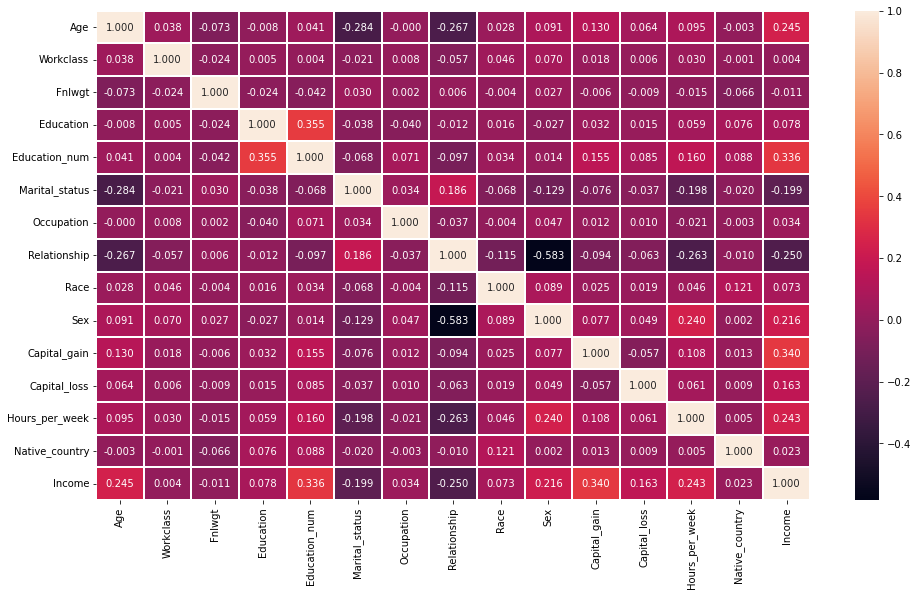

In [137]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(df1.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=0)


In [138]:
cor['Income'].sort_values(ascending=False)

Income            1.000000
Capital_gain      0.339778
Education_num     0.336189
Age               0.245367
Hours_per_week    0.243065
Sex               0.215579
Capital_loss      0.162781
Education         0.077845
Race              0.072690
Occupation        0.034063
Native_country    0.022830
Workclass         0.003723
Fnlwgt           -0.010923
Marital_status   -0.198533
Relationship     -0.250493
Name: Income, dtype: float64

# Visualizing the correlation between label and features using bar plot


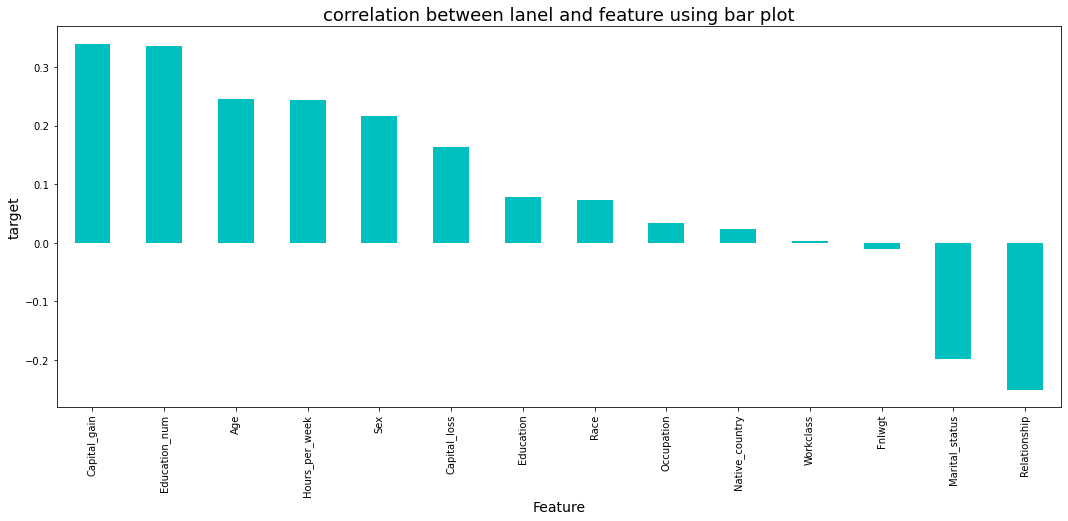

In [139]:
plt.figure(figsize=(18,7))
df1.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

# Dividing data in feature and Label

In [140]:
x=df1.drop(columns='Income')#Feature
y=df1.Income#Target

In [141]:
from imblearn.over_sampling import SMOTE

In [142]:
smt=SMOTE()
x_sample,y_sample=smt.fit_resample(x,y)

In [143]:
#Lets import standardscaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.87030597,  1.72614868, -1.25134   , ..., -0.20511256,
        -2.43136463,  0.26069089],
       [-0.02876051, -0.08037626,  0.61858631, ..., -0.20511256,
        -0.00545122,  0.26069089],
       [ 1.09507259, -0.08037626,  0.82878959, ..., -0.20511256,
        -0.00545122,  0.26069089],
       ...,
       [ 1.46968363, -0.08037626, -0.42224256, ..., -0.20511256,
        -0.00545122,  0.26069089],
       [-1.22751581, -0.08037626,  0.41670286, ..., -0.20511256,
        -1.80242412,  0.26069089],
       [ 1.02015039,  0.82288621,  1.24478155, ..., -0.20511256,
        -0.00545122,  0.26069089]])

# Now use VIF for checking multicollinearity problem

VIF - > Variance Inflation Factor

In [144]:
#Lets import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['feature']=x.columns

In [145]:
vif

,vif,feature
0,1.179915,Age
1,1.008464,Workclass
2,1.013152,Fnlwgt
3,1.156132,Education
4,1.227840,Education_num
5,1.138493,Marital_status
6,1.015752,Occupation
7,1.685572,Relationship
8,1.033357,Race
9,1.565482,Sex


# Logistic Regression

In [146]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [147]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split

In [148]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At Radom State ",i,"The Model Performs Very Well")
        print("At random State ",i,"The Model performs very well")
        print("Training Accuracy Score is :- ",accuracy_score(y_train,pred_train)*100)
        print("Testing Accuracy Score is : - ",accuracy_score(y_test,pred_test)*100,"\n")

At Radom State  2 The Model Performs Very Well
At random State  2 The Model performs very well
Training Accuracy Score is :-  80.77105387896982
Testing Accuracy Score is : -  80.80568720379146 

At Radom State  11 The Model Performs Very Well
At random State  11 The Model performs very well
Training Accuracy Score is :-  78.72491704850687
Testing Accuracy Score is : -  78.68878357030016 

At Radom State  23 The Model Performs Very Well
At random State  23 The Model performs very well
Training Accuracy Score is :-  78.5629641333544
Testing Accuracy Score is : -  78.5781990521327 

At Radom State  28 The Model Performs Very Well
At random State  28 The Model performs very well
Training Accuracy Score is :-  78.61826512877231
Testing Accuracy Score is : -  78.60979462875197 

At Radom State  29 The Model Performs Very Well
At random State  29 The Model performs very well
Training Accuracy Score is :-  78.62616527097488
Testing Accuracy Score is : -  78.5781990521327 

At Radom State  35 T

For Logistic Regression we select Random State - 218

# Lets check with KNN

In [149]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [150]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    knn.fit(x_train,y_train)
    x_pred=knn.predict(x_train)
    y_pred=knn.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 0.842392163058935
 At random state 0 , the testing accuracy is :- 0.7808846761453396


 At random state 1 , the testing accuracy is :- 0.8444462000316005
 At random state 1 , the testing accuracy is :- 0.7755134281200632


 At random state 2 , the testing accuracy is :- 0.8416811502607047
 At random state 2 , the testing accuracy is :- 0.7774091627172196


 At random state 3 , the testing accuracy is :- 0.8416416495496919
 At random state 3 , the testing accuracy is :- 0.7802527646129542


 At random state 4 , the testing accuracy is :- 0.8404961289303208
 At random state 4 , the testing accuracy is :- 0.7789889415481832


 At random state 5 , the testing accuracy is :- 0.8420761573708326
 At random state 5 , the testing accuracy is :- 0.7766192733017377


 At random state 6 , the testing accuracy is :- 0.8412466424395639
 At random state 6 , the testing accuracy is :- 0.7785150078988942


 At random state 7 , the testing accuracy is :- 0

For KNN we select Random State - 97

In [151]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=97)

In [152]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [153]:
knn.score(x_train,y_train)#Training Score

0.8437351872333702

In [154]:
knn.score(x_test,y_test)#Testing Score

0.7684044233807267

# Lets check with AdaBoostClassifier

In [155]:
from sklearn.ensemble import AdaBoostClassifier

In [156]:
ada = AdaBoostClassifier()

In [157]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    ada.fit(x_train,y_train)
    x_pred=ada.predict(x_train)
    y_pred=ada.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 0.8616290093221678
 At random state 0 , the testing accuracy is :- 0.8617693522906793


 At random state 1 , the testing accuracy is :- 0.861984515721283
 At random state 1 , the testing accuracy is :- 0.8546603475513428


 At random state 2 , the testing accuracy is :- 0.8606809922578607
 At random state 2 , the testing accuracy is :- 0.8595576619273302


 At random state 3 , the testing accuracy is :- 0.8609969979459631
 At random state 3 , the testing accuracy is :- 0.859083728278041


 At random state 4 , the testing accuracy is :- 0.8615500079001422
 At random state 4 , the testing accuracy is :- 0.8609794628751974


 At random state 5 , the testing accuracy is :- 0.8600489808816558
 At random state 5 , the testing accuracy is :- 0.8608214849921011


 At random state 6 , the testing accuracy is :- 0.8595354716384895
 At random state 6 , the testing accuracy is :- 0.8666666666666667


 At random state 7 , the testing accuracy is :- 0.

For AdaBoostClassifier we select Random State - 4

In [158]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [159]:
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [160]:
ada.score(x_train,y_train)#Training Score

0.8615500079001422

In [161]:
ada.score(x_test,y_test)#Testing Score

0.8609794628751974

# Lets check with Random Forest

In [162]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [163]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    rf.fit(x_train,y_train)
    x_pred=rf.predict(x_train)
    y_pred=rf.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 0.9999604992889872
 At random state 0 , the testing accuracy is :- 0.8598736176935229


 At random state 1 , the testing accuracy is :- 1.0
 At random state 1 , the testing accuracy is :- 0.8560821484992102


 At random state 2 , the testing accuracy is :- 0.9999604992889872
 At random state 2 , the testing accuracy is :- 0.8537124802527646


 At random state 3 , the testing accuracy is :- 0.9999604992889872
 At random state 3 , the testing accuracy is :- 0.8568720379146919


 At random state 4 , the testing accuracy is :- 0.9998814978669616
 At random state 4 , the testing accuracy is :- 0.8606635071090047


 At random state 5 , the testing accuracy is :- 0.9999209985779745
 At random state 5 , the testing accuracy is :- 0.8565560821484992


 At random state 6 , the testing accuracy is :- 0.9999604992889872
 At random state 6 , the testing accuracy is :- 0.8627172195892575


 At random state 7 , the testing accuracy is :- 0.9999209985779

For AdaBoostClassifier we select Random State - 31

In [168]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=31)

In [169]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [170]:
rf.score(x_train,y_train)

0.9999604992889872

In [171]:
rf.score(x_test,y_test)

0.8628751974723539

#  Do Hyperparameter Tuning

In [172]:
from sklearn.model_selection import GridSearchCV

In [173]:
grid_param={
    'criterion':['ginni','entropy'],
    'max_depth': range(10,15),# The Maximum depth of the tree
    'min_samples_leaf':range(2,6),#The maximum number of samples required to be at a leaf node
    'min_samples_split':range(3,8),#The minimum numbers of sample required to split an internal node
    'max_leaf_nodes':range(5,10)}#Best nodes are defined as them unlimited number of leaf nodes

In [174]:
grid_search=GridSearchCV(estimator=rf,
                         param_grid=grid_param,
                         cv=5,
                        n_jobs=-1)

In [175]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [176]:
cnn=RandomForestClassifier(criterion='gini',max_depth=12,max_leaf_nodes=4,min_samples_split= 5)

In [177]:
best_parameter=grid_search.best_params_
print(best_parameter)

{'criterion': 'entropy', 'max_depth': 13, 'max_leaf_nodes': 9, 'min_samples_leaf': 3, 'min_samples_split': 4}


In [178]:
#Train the model
cnn.fit(x_train,y_train)

RandomForestClassifier(max_depth=12, max_leaf_nodes=4, min_samples_split=5)

In [179]:
cnn.score(x_train,y_train)

0.8195212513825249

In [180]:
cnn.score(x_test,y_test)

0.8243285939968404

# Lets Save Our Model

In [181]:
import pickle
filename='Census.'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [182]:
loaded_model=pickle.load(open('Census','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

86.2875197472354


In [183]:
# batch  No - ds0522
# Data Trained